# Output variable -> y, y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")

In [42]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

In [43]:
bank=pd.read_csv("bank-full_copy.csv")

bank
 


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [44]:
#no null values, it is a clean data
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [45]:
#To check number of missing values?
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [46]:
#converting object type data into numerical value using hot label encoding
label_encoder = preprocessing.LabelEncoder()
bank['job']= label_encoder.fit_transform(bank['job']) 
bank['marital']= label_encoder.fit_transform(bank['marital']) 
bank['education']= label_encoder.fit_transform(bank['education']) 
bank['contact']= label_encoder.fit_transform(bank['contact'])
bank['poutcome']= label_encoder.fit_transform(bank['poutcome'])

In [47]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,no,2143,yes,no,2,5,may,261,1,-1,0,3,no
1,44,9,2,1,no,29,yes,no,2,5,may,151,1,-1,0,3,no
2,33,2,1,1,no,2,yes,yes,2,5,may,76,1,-1,0,3,no
3,47,1,1,3,no,1506,yes,no,2,5,may,92,1,-1,0,3,no
4,33,11,2,3,no,1,no,no,2,5,may,198,1,-1,0,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,no,825,no,no,0,17,nov,977,3,-1,0,3,yes
45207,71,5,0,0,no,1729,no,no,0,17,nov,456,2,-1,0,3,yes
45208,72,5,1,1,no,5715,no,no,0,17,nov,1127,5,184,3,2,yes
45209,57,1,1,1,no,668,no,no,1,17,nov,508,4,-1,0,3,no


In [48]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  int64 
 2   marital    45211 non-null  int64 
 3   education  45211 non-null  int64 
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  int64 
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  int64 
 16  y          45211 non-null  object
dtypes: int64(12), object(5)
memory usage: 5.9+ MB


In [50]:
# Custom Binary Encoding of Binary o/p variables 
bank['default'] = np.where(bank['default'].str.contains("yes"), 1, 0)
bank['housing'] = np.where(bank['housing'].str.contains("yes"), 1, 0)
bank['loan'] = np.where(bank['loan'].str.contains("yes"), 1, 0)
bank['y'] = np.where(bank['y'].str.contains("yes"), 1, 0)
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,may,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,may,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,may,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,nov,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,nov,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,nov,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,nov,508,4,-1,0,3,0


In [51]:
# Find and Replace Encoding for month categorical varaible
bank['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [52]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}

In [53]:
bank=bank.replace(order)

In [54]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,5,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,5,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,5,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,5,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,5,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,11,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,11,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,11,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,11,508,4,-1,0,3,0


In [55]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


In [61]:
 # Dividing our data into input and output variables
X=bank.drop(['y'], axis = 1)
Y=bank['y']

In [62]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,5,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,5,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,5,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,5,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,5,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,11,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,11,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,11,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,11,508,4,-1,0,3


In [63]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

# Model Building

In [64]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
classifier.coef_

array([[-2.37241817e-02,  5.52972269e-02, -1.20437407e-01,
        -1.23861868e-02, -6.00401064e-03,  3.90511235e-05,
        -2.41980324e-01, -6.47738397e-02, -2.85747112e-01,
        -1.75606568e-02, -8.30854691e-02,  3.47795067e-03,
        -2.98872779e-01, -1.33186244e-03,  1.28179544e-01,
        -2.28830809e-01]])

In [66]:
classifier.intercept_

array([-0.08889141])

In [67]:
classifier.classes_

array([0, 1])

In [68]:
classifier.predict_proba(X)

array([[0.93692163, 0.06307837],
       [0.93479413, 0.06520587],
       [0.95235357, 0.04764643],
       ...,
       [0.63077972, 0.36922028],
       [0.95708543, 0.04291457],
       [0.62171103, 0.37828897]])

In [69]:
classifier.score(X,Y)

0.8866868682400301

# Model prediction

In [70]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [71]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [73]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


# Testing model accuracy

In [74]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y,y_pred)
print(cm)

[[39184   738]
 [ 4385   904]]


In [75]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
(39184+904)/(39184+738+4385+904)

0.8866868682400301

# Accuracy of the model is approx 87%

In [76]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.55      0.17      0.26      5289

    accuracy                           0.89     45211
   macro avg       0.72      0.58      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [ ]:
# ROC Curve

0.5762173655910174


Text(0, 0.5, 'True Positive Rate')

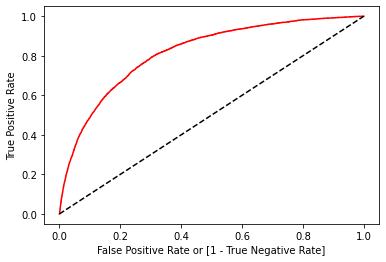

In [77]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [78]:
auc

0.5762173655910174

In [ ]:
#So, area under curve is approx 58%.